# 3. 멋진 단어사전 만들기 [프로젝트]

---

## 3-1. 프로젝트 : SentencePiece 사용하기
## 3-2. 프로젝트 제출

---

## 3-1. 프로젝트 : SentencePiece 사용하기  

### **라이브러리 버전을 확인해 봅니다.**

---

사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
3.4.3
0.5.2


### GOING_DEEPER LECTURE 2의 내용을 작성합니다.
Step 2의 모델 학습을 할 수 있게 하기 위함

In [2]:
# 라이브러리 임포트
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
# train 데이터 가져오기
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

In [4]:
# 데이터의 중복을 제거하고 문장 길이 확인
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


In [5]:
# 길이 조건에 맞는 문장만 선택하여 'filtered_corpus'를 획득
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

걸러진 값(`filtered_corpus`) 확인

In [6]:
filtered_corpus

['그러나 최근들어 차량폭탄 사건이 자주 발생한 것 같으며 AP통신이 집계한 사망자수 또한 지난달 보다 많아졌다고 한다.',
 '이 현상에 대한 지금 까지 가장 규모가 큰 연구 조사에서, 200명의 과학자들은 두께가 2마일이나 되는 것으로 추정되고 있는 이 구름이 1년에 수십만명이 호흡기 질환으로 사망하는 원인이 되고 있다고 경고했다.',
 '파한 하크 유엔 대변인은 “협정체결로 양국 관계가 정상화 됐다”며 “이를 통해 서로간에 피해를 주는 반군이나 무장단체의 국경 내 폭력사태 종식에 합의했다”고 밝혔다.',
 '이라크전 돌입 두 달 후인 지난 2003년 7월 전직 외교관 출신의 조세프 윌슨은 미중앙정보국(CIA)의 의뢰를 받아 이라크의 핵물질 수입 의혹을 조사한 적이 있다.',
 '또한 GM은 회사가 경기 불황 동안 비용 지출 효율성을 모색하고 있다고 밝혔다.',
 '그는 “9세 여자 아이들이 빔보를 멋진 역할 모델로 생각할 수 있는 모순에 빠질 위험이 있다”며 “빔보 게임은 위험하고 위협적이다”고 말했다.',
 '부시 미 대통령은 이란 이란의 핵무기를 보유하는것을 용인할 수 없다고 강력히 밝혔다.',
 '그가 이번 대회에서 우승할 경우 51년 전 브리시티 오픈을 3차례 연속 제패했던 피터 톰슨과 타이를 이루게 된다.',
 '헤몬드는 이번 에 발견된 악어는 애완용일 가능성이 있다며 몸집이 너무 커져 강에 버려졌을 지도 모른다고 지적했다.',
 '이와 관련 콘돌리자 라이스 미 국무장관은 새로 임명된 살람 파이야드 총리와 18일 전화통화를 했다고 밝혔다.',
 '하버드 대학에서 인터넷과 사회를 위한 버크만 센터를 운영하는 데이비드 웨인베르거는 인터넷은 사람들의 클릭 한번으로 명사들을 만들어내며 유저들에게 전통 매체로 만들어진 인사들 대신 이들에게 관심을 갖도록 만든다고 말했다.',
 '이전 그는 서신을 통해 자신의 건강상태가 좋지 않아 정치에 참여할 수 없다며 사임의 뜻을 밝혔던 피델 카스트로는 이번 의회에 출석하지 않았다.',
 '브래드 아담스 휴먼라이츠워치 

#### **Step 1. SentencePiece 설치하기**
아래 링크에서 세부 내용 확인 가능
- [google/sentencepiece](https://github.com/google/sentencepiece)

SentencePiece는 딥러닝 자연어처리 모델의 앞부분에 사용할 목적으로 최적화  
최근 pretrained model들이 대부분 tokenizer로 채용하여 사실상 표준의 역할을 수행중 
아래와 같이 설치를 진행, SentencePiece는 python wrapper가 존재함
```shell
$ pip install sentencepiece
```

In [7]:
!pip install sentencepiece

In [8]:
!pip list | grep sentencepiece

sentencepiece                 0.1.96


#### **Step 2. SentencePiece 모델 학습**
앞서 배운 `tokenizer()`  
```python
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer
```

`tf.keras.preprocessing.text.Tokenizer`에 corpus를 주고 `tokenizer.fit_on_texts(corpus)`를 하면 토크나이저 내부적으로 토크나이저 기능을 corpus에 맞춤형으로 자동 생성

In [9]:
# SentencePiece 모델 학습
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

def sp_train(model_type=None):
    command = '--input={} --model_prefix=korean_spm --model_type=unigram --vocab_size={}'
    
    if model_type == 'bpe':
        command = command.replace('--model_type=unigram', '--model_type=bpe')
    
    
    
    with open(temp_file, 'w') as f:
        
        for row in filtered_corpus:# 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
            f.write(str(row) + '\n')

        spm.SentencePieceTrainer.Train(
            command.format(temp_file, vocab_size)    
        )
        #위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

        !ls -l korean_spm*

        ## 모델 학습 완료 후 korean_spm.model 파일과 korean_spm.vocab 파일이 생성됨을 확인 가능

# 기본값 (model_type = unigram)으로 함수 실행
sp_train()

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --model_type=unigram --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_

-rw-r--r-- 1 root root 376829 Aug 16 07:48 korean_spm.model
-rw-r--r-- 1 root root 146211 Aug 16 07:48 korean_spm.vocab


학습된 SentencePiece 모델을 활용하는 예시

In [10]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3607, 11, 286, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


#### **Step 3. Tokenizer 함수 작성**
SentencePiece 모델을 활용하여 위와 유사한 기능을 하는 `sp_tokenize()`를 정의하려 함  
하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게 정의하기는 어렵다. 그러니 아래 조건을 만족하는 함수를 정의하도록 한다.

1. 매개변수로 토큰화된 문장의 `list`를 전달하는 대신 온전한 문장의 `list`를 전달합니다.
2. 생성된 vocab 파일을 읽어와 `{ <word> : <idx> }`형태를 가지는 `word_index` 사전과 `{ <idx> : <word> }` 형태를 가지는 `index_word` 사전을 생성하고 함께 반환합니다.
3. 리턴값인 `tensor`는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [11]:
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [12]:
sp_tokenize(s, filtered_corpus)

(array([[ 107,  231, 3607, ...,    0,    0,    0],
        [  25, 3054,    7, ...,    0,    0,    0],
        [ 300,   17,  307, ...,    0,    0,    0],
        ...,
        [ 787,   11,   47, ...,    0,    0,    0],
        [ 617,  163,    8, ...,    0,    0,    0],
        [  51,    4,   16, ...,    0,    0,    0]], dtype=int32),
 {'<unk>': 0,
  '<s>': 1,
  '</s>': 2,
  '.': 3,
  '▁': 4,
  '을': 5,
  '의': 6,
  '에': 7,
  '이': 8,
  '를': 9,
  '는': 10,
  '가': 11,
  '은': 12,
  ',': 13,
  '고': 14,
  '에서': 15,
  '로': 16,
  '한': 17,
  '▁“': 18,
  '인': 19,
  '”': 20,
  '일': 21,
  ')': 22,
  '(': 23,
  '과': 24,
  '▁이': 25,
  '와': 26,
  '으로': 27,
  '▁있다': 28,
  '지': 29,
  '도': 30,
  '▁수': 31,
  '할': 32,
  '했다': 33,
  '▁밝혔다': 34,
  '▁말했다': 35,
  '하고': 36,
  '년': 37,
  '다': 38,
  '하는': 39,
  '▁있는': 40,
  '기': 41,
  '리': 42,
  '▁그': 43,
  '자': 44,
  '▁전': 45,
  '며': 46,
  '스': 47,
  '해': 48,
  '▁2': 49,
  '▁1': 50,
  '▁그는': 51,
  '만': 52,
  '▁대한': 53,
  '된': 54,
  '▁위해': 55,
  '월': 56,
  '▁전했다': 57

#### **Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기**
[네이버 영화리뷰 감정 분석 태스크](https://github.com/e9t/nsmc/)가 있습니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용하게 되는데요.

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? KoNLPy에 있는 Mecab, kkma, Okt 등과 비교해보세요. (여러분들은 fasttext(https://wikidocs.net/22883) 로 사전훈련된 Word Vector를 사용할 수 있지만 sentencepiece와 KoNLPy에 있는 형태소로 모델을 만드는 것보다 코드 수정이 많이 일어납니다. 기본적인 태스크를 끝나고(sentencepiece - KoNLPy 형태소 비교) 도전하시는걸 추천합니다.)

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

##### 네이버 영화리뷰 다운로드
[참고 Link](https://wikidocs.net/44249)

`urllib` 모듈을 사용하여 데이터 다운로드

In [13]:
import urllib.request

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_test.txt")

('/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_test.txt',
 <http.client.HTTPMessage at 0x7f57d8bc3850>)

In [15]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_train.txt")

('/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_train.txt',
 <http.client.HTTPMessage at 0x7f57d896e7f0>)

데이터 로드 (`pandas` 모듈 사용)

In [16]:
import pandas as pd


test_data = pd.read_table('/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_test.txt')
train_data = pd.read_table('/aiffel/aiffel/sp_tokenizer/naver_movies/ratings_train.txt')


In [17]:
# 훈련용 리뷰 개수 확인
print('훈련용 리뷰 개수 :',len(train_data))

# 상위 5개 훈련 데이터 샘플 확인
train_data[:5]

훈련용 리뷰 개수 : 150000


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [18]:
# 테스트 리뷰 개수 확인
print('테스트용 리뷰 개수 :',len(test_data))

# 상위 5개 테스트 데이터 샘플 확인
test_data[:5]

테스트용 리뷰 개수 : 50000


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


#### 데이터 정제하기

In [19]:
# train_data의 데이터 중복 유무 확인
## document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [20]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [21]:
# 전체 샘플 수 확인 (중복 제거 확인용)
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


In [22]:
# 리뷰 중 null 값이 있는 샘플이 있는지를 확인
print(train_data.isnull().values.any())

True


In [23]:
# null 값이 몇 개인지를 확인
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [24]:
# null 샘플의 위치(index) 확인
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [25]:
# Null 값 있는 행 제거
train_data = train_data.dropna(how = 'any')

# null 값 확인
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


<AxesSubplot:>

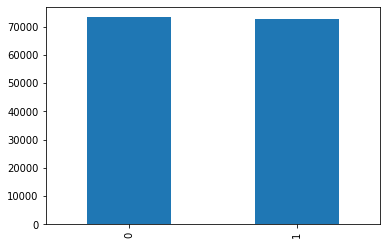

In [26]:
# train data 값 분포 현황
train_data['label'].value_counts().plot(kind = 'bar')

In [27]:
## 값 현황 파악
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72840


In [28]:
## Null값 확인
print(train_data.isnull().values.any())

False


In [29]:
# Train 데이터 한글 전처리
## 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

## 상위 5개 샘플 확인
train_data[:5]

/tmp/ipykernel_2872/412510165.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [30]:
# 한글이 없는 리뷰를 대상으로 전처리
## white space 데이터를 empty value로 변경
train_data['document'] = train_data['document'].str.replace('^ +', "")
## empty value를 null 값으로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


/tmp/ipykernel_2872/3392940956.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")


In [31]:
# Null 값 샘플 5개 확인
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [32]:
# null 값 제거
train_data = train_data.dropna(how = 'any')
# 제거 후 train_data 개수 확인
print(len(train_data))

145393


In [33]:
# test_data 전처리
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


/tmp/ipykernel_2872/3613743314.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_2872/3613743314.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


리뷰의 최대 길이 : 140
리뷰의 평균 길이 : 33.08291320765099


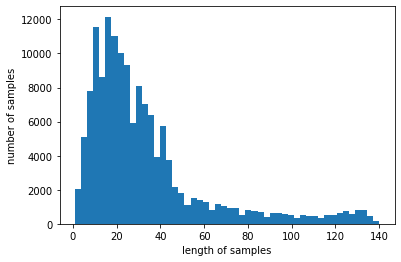

In [34]:
print('리뷰의 최대 길이 :',max(len(review) for review in train_data['document']))
print('리뷰의 평균 길이 :',sum(map(len, train_data['document']))/len(train_data['document']))
plt.hist([len(review) for review in train_data['document']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

정제된 리뷰의 최대 길이 : 30
정제된 리뷰의 평균 길이 : 17.068367438520912


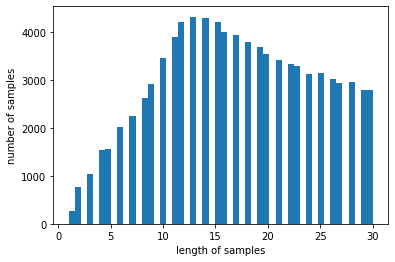

In [35]:
# 리뷰 길이가 30 까지만 훈련하기 위해 데이터 정제
max_review = 30

train_movie_review = [sentence for sentence in train_data['document'] if len(sentence) <= max_review]


print('정제된 리뷰의 최대 길이 :',max(len(review) for review in train_movie_review))
print('정제된 리뷰의 평균 길이 :',sum(map(len, train_movie_review))/len(train_movie_review))
plt.hist([len(review) for review in train_movie_review], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [36]:
# 정제된 train_data의 말뭉치를 가지고 sentence_piece 함수 수행하여 tensor 뭉치 획득
# tensor, _, __ = sp_tokenize(s, train_data['document'])
tensor, _, __ = sp_tokenize(s, train_movie_review)

In [37]:
tensor

array([[ 141,  106, 2610, ...,    0,    0,    0],
       [   4, 7663,  466, ...,    0,    0,    0],
       [1326,  437,    0, ...,    0,    0,    0],
       ...,
       [  25,   82,    4, ...,    0,    0,    0],
       [1216, 4317,  216, ...,    0,    0,    0],
       [ 148,  216, 4229, ...,    0,    0,    0]], dtype=int32)

In [38]:
# 학습 데이터 세팅
X_train = tensor
# train_data에서 y_train, y_test 데이터 획득
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [39]:
# 데이터 개수 확인
len(X_train)

89136

In [40]:
# 데이터 개수 확인
len(y_train)

145393

In [41]:
# 빈 샘플 제거하기 위한 drop_train
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [42]:
# 빈 샘플 제거 및 확인
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

89136
145393


#### LSTM으로 영화 리뷰 김성분석

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 1
hidden_units = 16

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/15
1115/1115 [==============================] - 10s 6ms/step - loss: 0.6932 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.5033

Epoch 00001: val_acc improved from -inf to 0.50331, saving model to best_model.h5
Epoch 2/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6932 - acc: 0.5008 - val_loss: 0.6931 - val_acc: 0.5043

Epoch 00002: val_acc improved from 0.50331 to 0.50432, saving model to best_model.h5
Epoch 3/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6922 - acc: 0.5169 - val_loss: 0.6941 - val_acc: 0.5049

Epoch 00003: val_acc improved from 0.50432 to 0.50488, saving model to best_model.h5
Epoch 4/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6894 - acc: 0.5349 - val_loss: 0.6943 - val_acc: 0.5012

Epoch 00004: val_acc did not improve from 0.50488
Epoch 5/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6871 - acc: 0.5452 - val_loss: 0.7002 - val_acc: 0.4971

Epoch 00005: val_acc d

In [44]:
# test_data의 말뭉치를 가지고 sentence_piece 함수 수행하여 tensor 뭉치 획득
X_test, _, __ = sp_tokenize(s, test_data['document'])

In [45]:
# 테스트 정확도 확인
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 5s 3ms/step - loss: 0.6971 - acc: 0.4966

 테스트 정확도: 0.4966


In [46]:
# 리뷰 예측해보는 함수 생성
def sentiment_predict(new_sentence):
    test = [new_sentence]
    tensor, _, _ = sp_tokenize(s, test)
    score = float(loaded_model.predict(tensor)) # 예측
    
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [47]:
## 리뷰 예측 예제 1
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

50.65% 확률로 부정 리뷰입니다.



In [48]:
## 리뷰 예측 예제 2
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

50.76% 확률로 부정 리뷰입니다.



In [49]:
# 리뷰 예측 예제 3
sentiment_predict('이딴게 영화냐 ㅉㅉ')

50.76% 확률로 부정 리뷰입니다.



In [50]:
# 리뷰 예측 예제 4
sentiment_predict('감독 뭐하는 놈이냐?')

51.07% 확률로 부정 리뷰입니다.



`train_data`의 문장 길이를 제한해서 학습을 시켜야 할 것 같다..

#### sentencepiece 모델 학습 옵션 변경하여 테스트

In [51]:
## sp_train()의 옵션을 default에서 `bpe`로 변경하여 수행
sp_train(model_type='bpe')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --model_type=bpe --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_voca

-rw-r--r-- 1 root root 371936 Aug 16 07:49 korean_spm.model
-rw-r--r-- 1 root root 117142 Aug 16 07:49 korean_spm.vocab


In [52]:
## 새로운 sentence_place() 모델
embedding_dim = 1
hidden_units = 16

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('new_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/15
1115/1115 [==============================] - 8s 5ms/step - loss: 0.6932 - acc: 0.5026 - val_loss: 0.6931 - val_acc: 0.5033

Epoch 00001: val_acc improved from -inf to 0.50331, saving model to new_best_model.h5
Epoch 2/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6931 - acc: 0.5023 - val_loss: 0.6934 - val_acc: 0.4980

Epoch 00002: val_acc did not improve from 0.50331
Epoch 3/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6911 - acc: 0.5239 - val_loss: 0.6967 - val_acc: 0.4951

Epoch 00003: val_acc did not improve from 0.50331
Epoch 4/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6889 - acc: 0.5347 - val_loss: 0.6944 - val_acc: 0.4988

Epoch 00004: val_acc did not improve from 0.50331
Epoch 5/15
1115/1115 [==============================] - 6s 5ms/step - loss: 0.6868 - acc: 0.5422 - val_loss: 0.7004 - val_acc: 0.5039

Epoch 00005: val_acc improved from 0.50331 to 0.50393, saving model to new_best_model.h5


In [53]:
# 테스트 정확도 확인
loaded_model = load_model('new_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 5s 3ms/step - loss: 0.7339 - acc: 0.5040

 테스트 정확도: 0.5040


In [54]:
## 리뷰 예측 예제 1
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

52.95% 확률로 부정 리뷰입니다.



In [55]:
## 리뷰 예측 예제 2
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

50.88% 확률로 부정 리뷰입니다.



In [56]:
# 리뷰 예측 예제 3
sentiment_predict('이딴게 영화냐 ㅉㅉ')

51.03% 확률로 부정 리뷰입니다.



In [57]:
# 리뷰 예측 예제 4
sentiment_predict('감독 뭐하는 놈이냐?')

55.01% 확률로 부정 리뷰입니다.



### 개인 분석 및 소감
1. 초기에는 데이터 전처리 문제로 인식하였다.
    - 리뷰 길이가 30 이하인 것들만 사용하면 좋지 않을까 생각하였음
    - 그럼에도 accuracy는 좋아지지 않더라
2. 모델에 대한 이해가 부족한거 같다.
    - LSTM()을 포함한 방식 (RNN)이나 다른 방식의 구현을 좀 고려해야한다.
3. 1번에 대해 X_test가 잘못됨을 인지하였다.
    - 현재 (17:50 기준) 코드 수정 중
    - 추가 테스트 후 업로드 예정임.